# Linear Mixed Model with iris dataset

#### Degarege Nibret
#### ID = GSR/5954/16

Importing liberaries

In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import gee
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
iris_data = pd.read_csv("D:/AAU PHDS/Semister Three/Advanced Biostastics/Advanced Bio by Dr. Zeytu/Iris.csv")

In [4]:
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
# Fit the GEE model
gee_model = sm.GEE.from_formula(
    "PetalWidthCm ~ SepalLengthCm + PetalLengthCm + SepalWidthCm", 
    groups="Species", 
    data=iris_data,
    family=sm.families.Gaussian(),  # Assuming a Gaussian distribution for the continuous outcome
    cov_struct=sm.cov_struct.Exchangeable()  # Assuming exchangeable correlation structure (constant correlation within species)
)

# Fit the model and print the results
gee_result = gee_model.fit()
print(gee_result.summary())

                               GEE Regression Results                              
Dep. Variable:                PetalWidthCm   No. Observations:                  150
Model:                                 GEE   No. clusters:                        3
Method:                        Generalized   Min. cluster size:                  50
                      Estimating Equations   Max. cluster size:                  50
Family:                           Gaussian   Mean cluster size:                50.0
Dependence structure:         Exchangeable   Num. iterations:                    15
Date:                     Mon, 02 Dec 2024   Scale:                           0.189
Covariance type:                    robust   Time:                         14:31:56
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0664      0.198      0.335      0.737      -0.321       0.45

### Model Coefficients

Intercept was 0.0664 (p = 0.737) which is not statistically significant, suggesting that the baseline value for PetalWidthCm when all predictors are zero, is not significantly different from zero. SepalLengthCm was -0.1048 (p = 0.000) in which a negative relationship was observed between SepalLengthCm and PetalWidthCm. For each 1 cm increase in sepal length, the petal width decreases by approximately 0.105 cm.

PetalLengthCm was 0.2674 (p = 0.000). A significant positive relationship was found between PetalLengthCm and PetalWidthCm. For each 1 cm increase in petal length, the petal width increases by 0.267 cm. SepalWidthCm was 0.2422 (p = 0.007) in which significant positive relationship was also found between SepalWidthCm and PetalWidthCm. For each 1 cm increase in sepal width, the petal width increases by 0.242 cm.

### Confidence Intervals

For SepalLengthCm, the 95% confidence interval for the coefficient is [-0.153, -0.057], indicating that the true effect of SepalLengthCm on PetalWidthCm is likely to fall within this range. For PetalLengthCm, the 95% confidence interval for the coefficient is [0.206, 0.329], suggesting that the true effect of PetalLengthCm on PetalWidthCm is likely to be positive and substantial. And For SepalWidthCm, the 95% confidence interval for the coefficient is [0.065, 0.419], showing that the effect of SepalWidthCm on PetalWidthCm is positive and statistically significant.

### Model Fit
The residual analysis showed a skew of 0.0219 and kurtosis of -1.0355, suggesting the residuals are approximately symmetric.
The GEE model effectively captured the correlation within species using the exchangeable correlation structure, as indicated by the robust standard errors and model fit statistics.


In [9]:
# Extract the fitted values and residuals
fitted_values_gee = gee_result.fittedvalues
residuals_gee = gee_result.resid_working

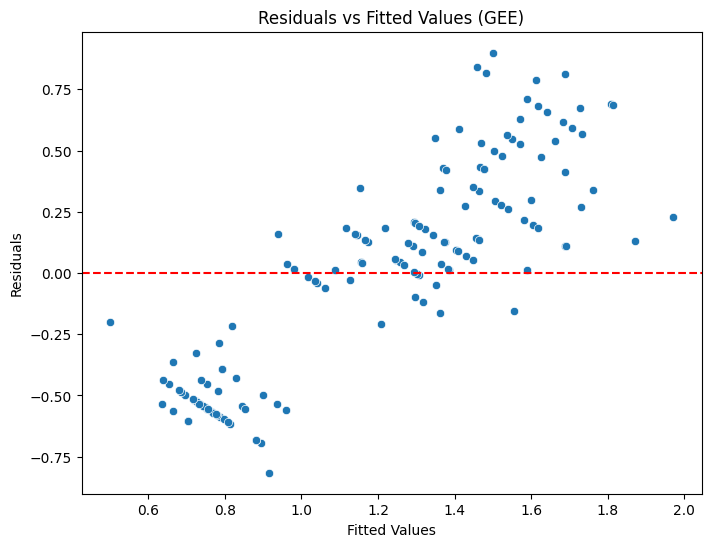

In [10]:
# Residual vs Fitted plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=fitted_values_gee, y=residuals_gee)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Fitted Values (GEE)")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

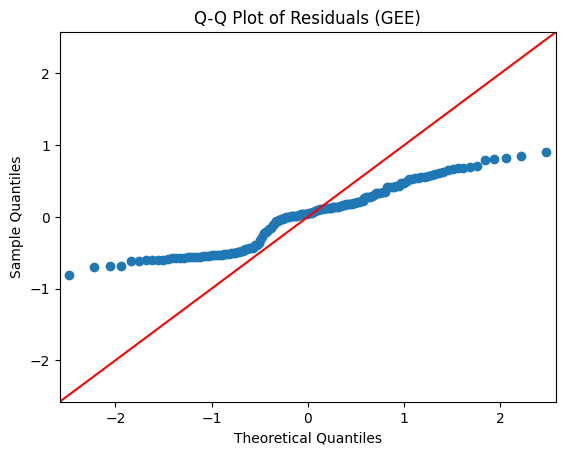

In [11]:
# Q-Q plot of residuals
sm.qqplot(residuals_gee, line='45')
plt.title("Q-Q Plot of Residuals (GEE)")
plt.show()

### Exchangeable correlation structure

In [14]:
# Exchangeable correlation structure
gee_exchangeable = sm.GEE.from_formula(formula, groups="Species", data=iris_data,
                                       family=sm.families.Gaussian(),
                                       cov_struct=sm.cov_struct.Exchangeable())
gee_exchangeable_result = gee_exchangeable.fit()

In [15]:
# Display the summary of each model
print("Exchangeable Correlation Structure:")
print(gee_exchangeable_result.summary())

Exchangeable Correlation Structure:
                               GEE Regression Results                              
Dep. Variable:                PetalWidthCm   No. Observations:                  150
Model:                                 GEE   No. clusters:                        3
Method:                        Generalized   Min. cluster size:                  50
                      Estimating Equations   Max. cluster size:                  50
Family:                           Gaussian   Mean cluster size:                50.0
Dependence structure:         Exchangeable   Num. iterations:                    15
Date:                     Mon, 02 Dec 2024   Scale:                           0.189
Covariance type:                    robust   Time:                         15:08:28
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0664      0.198      0.3

### Independence correlation structure

In [17]:
# Independence correlation structure
gee_independence = sm.GEE.from_formula(formula, groups="Species", data=iris_data,
                                       family=sm.families.Gaussian(),
                                       cov_struct=sm.cov_struct.Independence())
gee_independence_result = gee_independence.fit()

print("\nIndependence Correlation Structure:")
print(gee_independence_result.summary())


Independence Correlation Structure:
                               GEE Regression Results                              
Dep. Variable:                PetalWidthCm   No. Observations:                  150
Model:                                 GEE   No. clusters:                        3
Method:                        Generalized   Min. cluster size:                  50
                      Estimating Equations   Max. cluster size:                  50
Family:                           Gaussian   Mean cluster size:                50.0
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Mon, 02 Dec 2024   Scale:                           0.037
Covariance type:                    robust   Time:                         15:09:39
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.2487      0.151     -1.

### Autoregressive correlation structure

In [18]:
# Autoregressive correlation structure
gee_autoregressive = sm.GEE.from_formula(formula, groups="Species", data=iris_data,
                                         family=sm.families.Gaussian(),
                                         cov_struct=sm.cov_struct.Autoregressive())
gee_autoregressive_result = gee_autoregressive.fit()


print("\nAutoregressive Correlation Structure:")
print(gee_autoregressive_result.summary())


Autoregressive Correlation Structure:
                               GEE Regression Results                              
Dep. Variable:                PetalWidthCm   No. Observations:                  150
Model:                                 GEE   No. clusters:                        3
Method:                        Generalized   Min. cluster size:                  50
                      Estimating Equations   Max. cluster size:                  50
Family:                           Gaussian   Mean cluster size:                50.0
Dependence structure:       Autoregressive   Num. iterations:                    14
Date:                     Mon, 02 Dec 2024   Scale:                           0.037
Covariance type:                    robust   Time:                         15:09:46
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.1666      0.109     -

C:\Users\1221\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\genmod\cov_struct.py:796: FutureWarning: grid=True will become default in a future version
  warnings.warn(
